## Pytorch compatible data generator example
---

Example showing how to create a PyTorch compatible generator which windows trace data and applies standard data augmentation steps. 

Current version of the data generator code is incomplete and subject to change**

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('./', os.pardir)))

import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import seisbench.data

Get dummy dataset:

In [2]:
dummy = seisbench.data.DummyDataset()
print(dummy)

dummydataset - 100 traces


Create training/label example generator object.

In [3]:
from seisbench.util.generate import PytorchWindowGenerator

pwg = PytorchWindowGenerator(
    dataset=dummy,
    windowlen=600,
    timestep=200,
    processing={'shuffle': False}
)

Simple PyTorch generator creates sequential windows of traces. Each iteration of the generator will window a trace using a pre-defined window length and timestep. Generator object inherits all functionality of a standard PyTorch Dataset so then can be wrapped in a DataLoader class adding standard multiprocessing worker, batch functionality etc.

In [4]:
# Wrap generator in PyTorch DataLoader
train_loader = torch.utils.data.DataLoader(
    dataset=pwg, 
    batch_size=5, 
    pin_memory=True, 
    shuffle=False
)

Iterate through training data...

In [5]:
def compress_batch_dim(t):
    """
    Utility function to stack tensor data along batch dim.
    :param t: tensor, format (B, N, W, C)
    :type t: torch.Tensor
    :return : t: tensor, format (N, C, W)
    """
    return t.reshape(-1, t.shape[2], t.shape[3])


for X, y in train_loader:
    print('PyTorch DataLoader format:\n\t[B, N, C, W]\n')
    print('-->', X.shape)
    
    X = compress_batch_dim(X)
    print('\nCompressed windows along batch dim (now [N, C, W])\n')
    print('-->', X.shape)
    break

PyTorch DataLoader format:
	[B, N, C, W]

--> torch.Size([5, 3, 3, 600])

Compressed windows along batch dim (now [N, C, W])

--> torch.Size([15, 3, 600])


Plot all training examples (no processing applied to windowed traces)

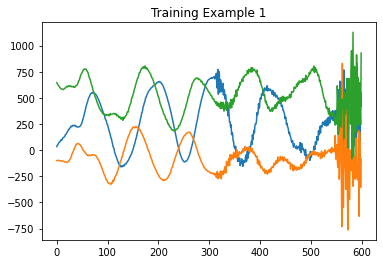

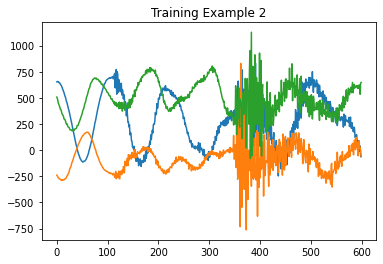

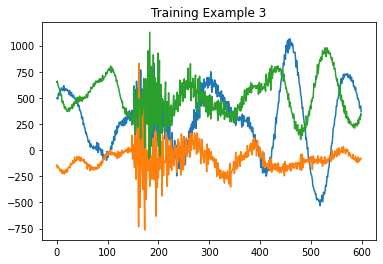

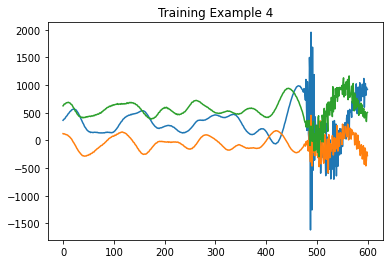

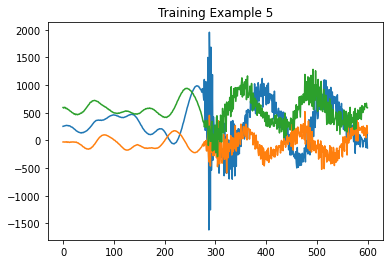

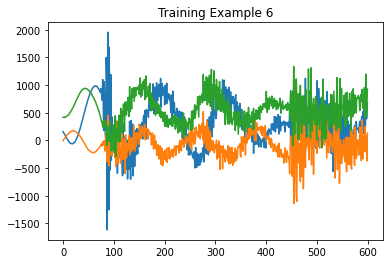

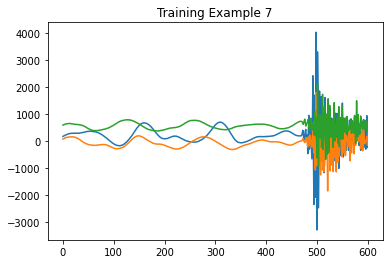

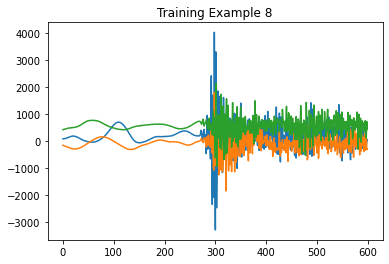

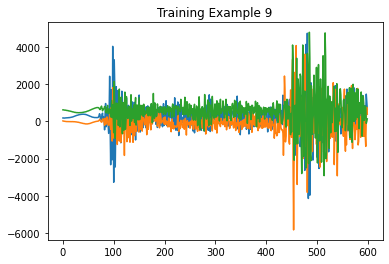

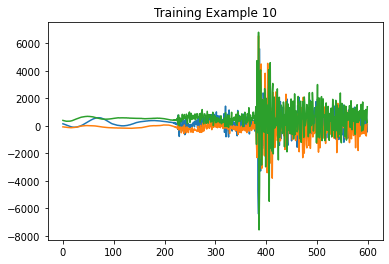

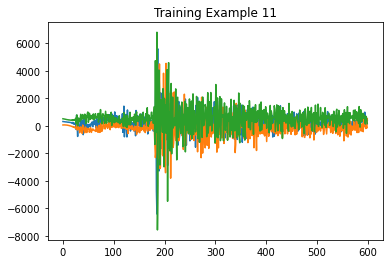

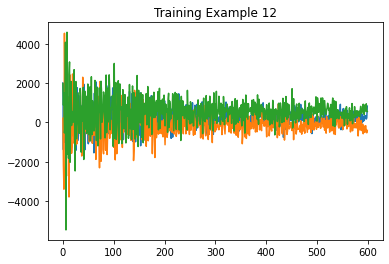

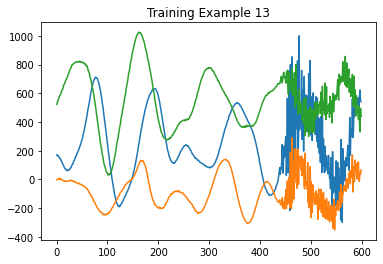

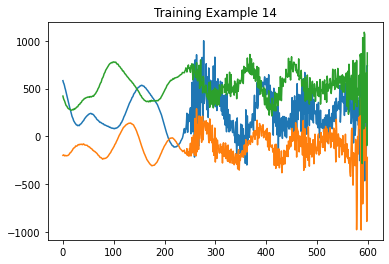

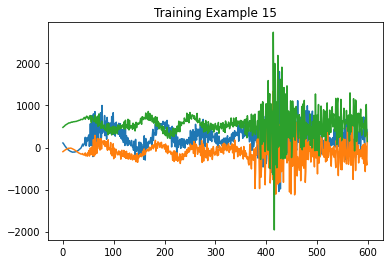

In [6]:
for i, window in enumerate(X):
    plt.title(f'Training Example {i+1}')
    plt.plot(window.T)
    plt.show()